In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Carga del dataset

In [3]:
df = pd.read_csv('../data/raw/Modelar_UH2020.txt', sep='|')
df_test = pd.read_csv('../data/raw/Estimar_UH2020.txt', sep='|')

In [4]:
df.shape

(103230, 56)

*“Modelar…” contiene 103.230 registros con 56 variables incluyendo la variable objetivo* - Esta cargado OK el df

# Analisis Exploratorio Rápido

In [5]:
df.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
1,F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
2,B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
3,1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4,4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


Vemos que el dataset tiene la estructura esperada

In [6]:
df.dtypes

ID                     object
X                       int64
Y                       int64
Q_R_4_0_0             float64
Q_R_4_0_1             float64
Q_R_4_0_2             float64
Q_R_4_0_3             float64
Q_R_4_0_4             float64
Q_R_4_0_5             float64
Q_R_4_0_6             float64
Q_R_4_0_7             float64
Q_R_4_0_8             float64
Q_R_4_0_9             float64
Q_R_4_1_0             float64
Q_G_3_0_0             float64
Q_G_3_0_1             float64
Q_G_3_0_2             float64
Q_G_3_0_3             float64
Q_G_3_0_4             float64
Q_G_3_0_5             float64
Q_G_3_0_6             float64
Q_G_3_0_7             float64
Q_G_3_0_8             float64
Q_G_3_0_9             float64
Q_G_3_1_0             float64
Q_B_2_0_0             float64
Q_B_2_0_1             float64
Q_B_2_0_2             float64
Q_B_2_0_3             float64
Q_B_2_0_4             float64
Q_B_2_0_5             float64
Q_B_2_0_6             float64
Q_B_2_0_7             float64
Q_B_2_0_8 

Son todos datos numéricos. Excepto por La variable objetivo **CLASE** y por **CADASTRALQUALITYID**, ademas del ID

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,103230.0,2.208858e+09,2.751723e+07,2.120751e+09,2.194235e+09,2.205985e+09,2.224105e+09,2.287300e+09
Y,103230.0,1.655955e+08,2.040199e+05,1.650957e+08,1.654515e+08,1.655907e+08,1.657138e+08,1.665046e+08
Q_R_4_0_0,103230.0,4.578804e-05,3.168761e-03,0.000000e+00,0.000000e+00,0.000000e+00,5.786675e-07,1.016050e+00
Q_R_4_0_1,103230.0,3.826336e+02,9.947087e+01,1.510004e+02,3.169976e+02,3.850010e+02,4.450029e+02,8.339994e+02
Q_R_4_0_2,103230.0,5.486591e+02,1.214399e+02,1.849994e+02,4.920038e+02,5.629976e+02,6.270010e+02,1.016001e+03
Q_R_4_0_3,103230.0,6.840166e+02,1.377636e+02,2.140005e+02,6.329996e+02,6.980040e+02,7.700016e+02,1.200003e+03
Q_R_4_0_4,103230.0,8.110539e+02,1.534864e+02,2.399995e+02,7.539996e+02,8.339966e+02,9.050000e+02,1.378000e+03
Q_R_4_0_5,103230.0,9.399780e+02,1.695464e+02,2.699995e+02,8.750081e+02,9.699998e+02,1.042505e+03,1.570505e+03
Q_R_4_0_6,103230.0,1.080128e+03,1.864224e+02,3.109995e+02,1.006997e+03,1.115001e+03,1.200006e+03,1.806003e+03
Q_R_4_0_7,103230.0,1.242842e+03,2.069939e+02,3.829998e+02,1.173999e+03,1.268998e+03,1.348996e+03,2.175695e+03


## CLASE

In [8]:
df.CLASE.value_counts()

RESIDENTIAL    90173
INDUSTRIAL      4490
PUBLIC          2976
RETAIL          2093
OFFICE          1828
OTHER           1332
AGRICULTURE      338
Name: CLASE, dtype: int64

In [9]:
df.CLASE.value_counts(normalize=True)

RESIDENTIAL    0.873515
INDUSTRIAL     0.043495
PUBLIC         0.028829
RETAIL         0.020275
OFFICE         0.017708
OTHER          0.012903
AGRICULTURE    0.003274
Name: CLASE, dtype: float64

Esta muy desbalanceado el problema. Se supone que el dataset a entregar no esta tan desbalanceado. Hay que jugar con over and under sampling

## CADASTRALQUALITYID

In [10]:
df.CADASTRALQUALITYID.value_counts(normalize=True)

4    0.238552
6    0.237651
5    0.188674
7    0.133698
3    0.098915
8    0.053745
2    0.028873
9    0.010706
1    0.006317
C    0.002093
B    0.000417
A    0.000358
Name: CADASTRALQUALITYID, dtype: float64

In [11]:
df.CADASTRALQUALITYID.isna().sum()

20

In [12]:
df[df.CADASTRALQUALITYID.isna()]

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
9864,B7DE3FE20084F9FA,2254413625,165244276,0.000597,592.998193,742.001184,855.996881,976.798755,1106.998474,1238.995532,...,6763.517046,2120.276750,0.465508,0.015959,0.013757,0.862017,1975,NaN,NaN,INDUSTRIAL
10145,5D08956CDC0B7C37,2250193143,165232359,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,1999.778850,0.531552,0.016810,0.015813,0.940702,1975,NaN,NaN,AGRICULTURE
12273,20D3200047F4D73A,2254610358,165241603,0.000597,592.998193,742.001184,855.996881,976.798755,1106.998474,1238.995532,...,6763.517046,723.268350,0.563042,0.036284,0.021455,0.591289,1975,NaN,NaN,AGRICULTURE
13089,82489ECC7BDFB0B0,2250087048,165252257,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,1829.160728,0.153173,0.009619,0.008705,0.905010,1975,NaN,NaN,RETAIL
16330,6447D96932B64C3F,2250800402,165234583,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,249.497550,0.361907,0.040209,0.036075,0.897186,1975,NaN,NaN,AGRICULTURE
23184,8BF6E2CB5B152739,2248534716,165225185,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,159.968400,0.294582,0.042373,0.043459,1.025641,1975,NaN,NaN,AGRICULTURE
34988,621448B2B12E3B3E,2233865202,165097257,0.000009,609.998492,778.999695,889.001544,976.000098,1068.000366,1169.998853,...,5208.317414,710.658165,0.115690,0.014473,0.011248,0.777191,1950,NaN,NaN,AGRICULTURE
38537,042ABAFAE9B5BDB9,2246045656,165214428,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,4112.808185,0.028464,0.003521,0.001966,0.558325,1966,NaN,NaN,INDUSTRIAL
43448,55B7201B5219C83B,2260254994,165132637,0.000004,437.000958,597.003247,711.998651,806.999329,910.999084,1039.000195,...,5922.090811,47.266733,0.043968,0.031348,0.029674,0.946588,1982,NaN,NaN,AGRICULTURE
48059,51DCB5C9945A826E,2239496952,165148413,0.000006,493.999994,610.000061,687.999243,754.999768,824.999542,912.000513,...,5270.232234,88.353700,0.469356,0.068634,0.077399,1.127709,1957,NaN,NaN,AGRICULTURE


## CONTRUCTIONYEAR

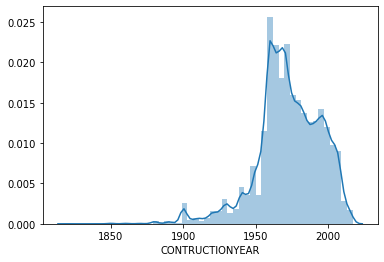

In [26]:
sns.distplot(df.CONTRUCTIONYEAR)

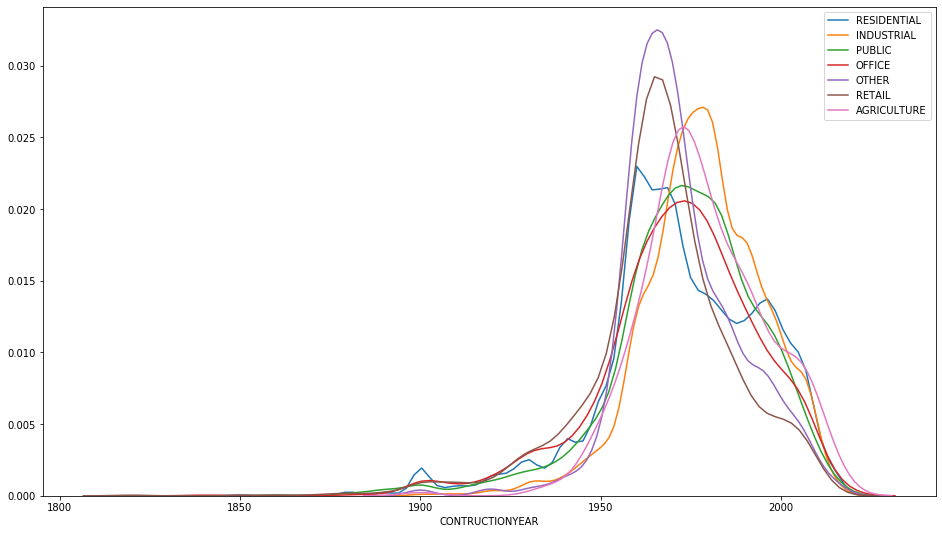

In [124]:
plt.figure(figsize=(16,9))
for clase in df.CLASE.unique():
    sns.distplot(df.loc[df.CLASE == clase, 'CONTRUCTIONYEAR'], label=clase, hist=False)
    
plt.legend()

## MAXBUILDINGFLOOR

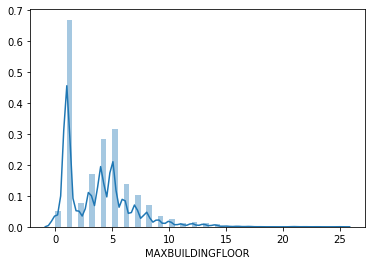

In [29]:
sns.distplot(df.MAXBUILDINGFLOOR.dropna())

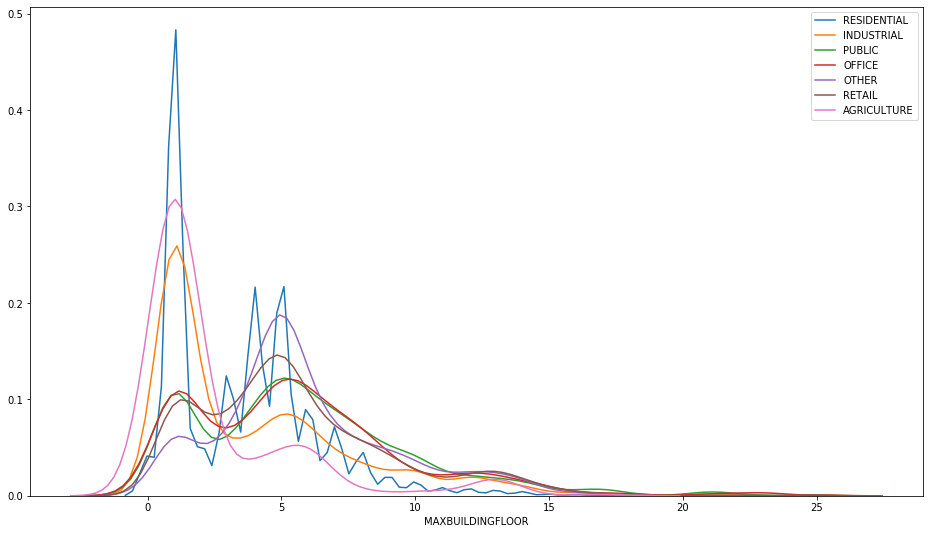

In [129]:
plt.figure(figsize=(16,9))
for clase in df.CLASE.unique():
    sns.distplot(df.loc[df.CLASE == clase, 'MAXBUILDINGFLOOR'].dropna(), label=clase, hist=False)
    
plt.legend()

In [30]:
df[df.MAXBUILDINGFLOOR.isna()]

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
9864,B7DE3FE20084F9FA,2254413625,165244276,0.000597,592.998193,742.001184,855.996881,976.798755,1106.998474,1238.995532,...,6763.517046,2120.276750,0.465508,0.015959,0.013757,0.862017,1975,NaN,NaN,INDUSTRIAL
10145,5D08956CDC0B7C37,2250193143,165232359,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,1999.778850,0.531552,0.016810,0.015813,0.940702,1975,NaN,NaN,AGRICULTURE
12273,20D3200047F4D73A,2254610358,165241603,0.000597,592.998193,742.001184,855.996881,976.798755,1106.998474,1238.995532,...,6763.517046,723.268350,0.563042,0.036284,0.021455,0.591289,1975,NaN,NaN,AGRICULTURE
13089,82489ECC7BDFB0B0,2250087048,165252257,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,1829.160728,0.153173,0.009619,0.008705,0.905010,1975,NaN,NaN,RETAIL
16330,6447D96932B64C3F,2250800402,165234583,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,249.497550,0.361907,0.040209,0.036075,0.897186,1975,NaN,NaN,AGRICULTURE
23184,8BF6E2CB5B152739,2248534716,165225185,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,159.968400,0.294582,0.042373,0.043459,1.025641,1975,NaN,NaN,AGRICULTURE
34988,621448B2B12E3B3E,2233865202,165097257,0.000009,609.998492,778.999695,889.001544,976.000098,1068.000366,1169.998853,...,5208.317414,710.658165,0.115690,0.014473,0.011248,0.777191,1950,NaN,NaN,AGRICULTURE
38537,042ABAFAE9B5BDB9,2246045656,165214428,0.000000,648.000018,788.999866,894.999255,987.001318,1079.999817,1184.999121,...,6084.405066,4112.808185,0.028464,0.003521,0.001966,0.558325,1966,NaN,NaN,INDUSTRIAL
43448,55B7201B5219C83B,2260254994,165132637,0.000004,437.000958,597.003247,711.998651,806.999329,910.999084,1039.000195,...,5922.090811,47.266733,0.043968,0.031348,0.029674,0.946588,1982,NaN,NaN,AGRICULTURE
48059,51DCB5C9945A826E,2239496952,165148413,0.000006,493.999994,610.000061,687.999243,754.999768,824.999542,912.000513,...,5270.232234,88.353700,0.469356,0.068634,0.077399,1.127709,1957,NaN,NaN,AGRICULTURE


Hay que tener cuidado con los NA, la mayoria son *AGRICULTURE* que es la clase con menos registros. Se pueden imputar o tambien tener en cuanta "NA" como posbile valor de entrada

## Latitude AND Longitude

In [62]:
min_X = df.X.min() - 10e6
max_X = df.X.max() + 10e6
min_Y = df.Y.min() - 2e5
max_Y = df.Y.max() + 2e5

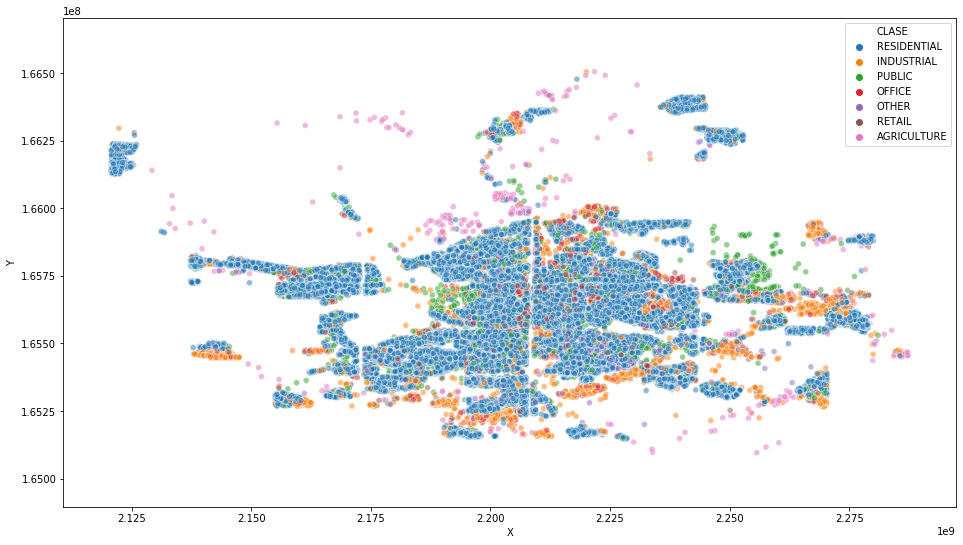

In [63]:
plt.figure(figsize=(16,9))
plt.xlim(min_X, max_X)
plt.ylim(min_Y, max_Y)
sns.scatterplot(df.X, df.Y, hue=df.CLASE, alpha=0.5)

In [84]:
def plot_class(classname):
    df_aux = df[df.CLASE.isin(classname)]
    plt.figure(figsize=(8,4.5))
    plt.xlim(min_X, max_X)
    plt.ylim(min_Y, max_Y)
    plt.title(' '.join(classname))
    plt.grid(True)
    sns.scatterplot(df_aux.X, df_aux.Y, alpha=0.5, hue=df_aux.CLASE)

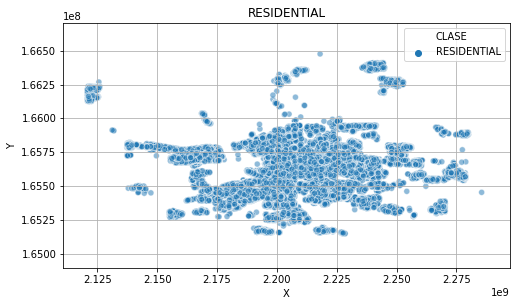

In [86]:
plot_class(['RESIDENTIAL'])

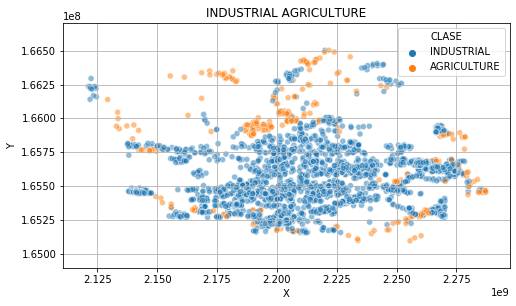

In [87]:
plot_class(['INDUSTRIAL', 'AGRICULTURE'])

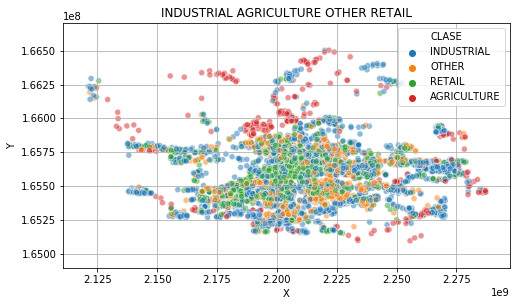

In [89]:
plot_class(['INDUSTRIAL', 'AGRICULTURE', 'OTHER', 'RETAIL'])

Latitude and Longitude are very very important features.

## Area

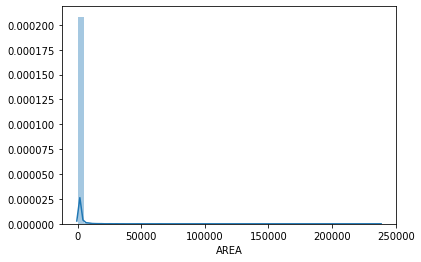

In [90]:
sns.distplot(df.AREA)

Claramente hay outliers

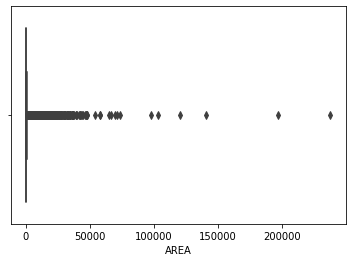

In [92]:
sns.boxplot(df.AREA)

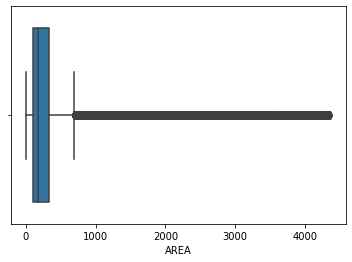

In [94]:
sns.boxplot(df.loc[df.AREA < df.AREA.quantile(0.99), 'AREA'])

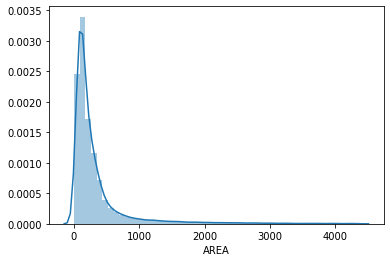

In [95]:
sns.distplot(df.loc[df.AREA < df.AREA.quantile(0.99), 'AREA'])

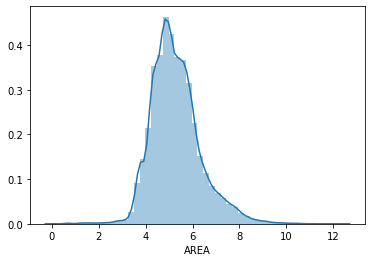

In [121]:
sns.distplot(df.AREA.apply(lambda x: math.log(x+1)))

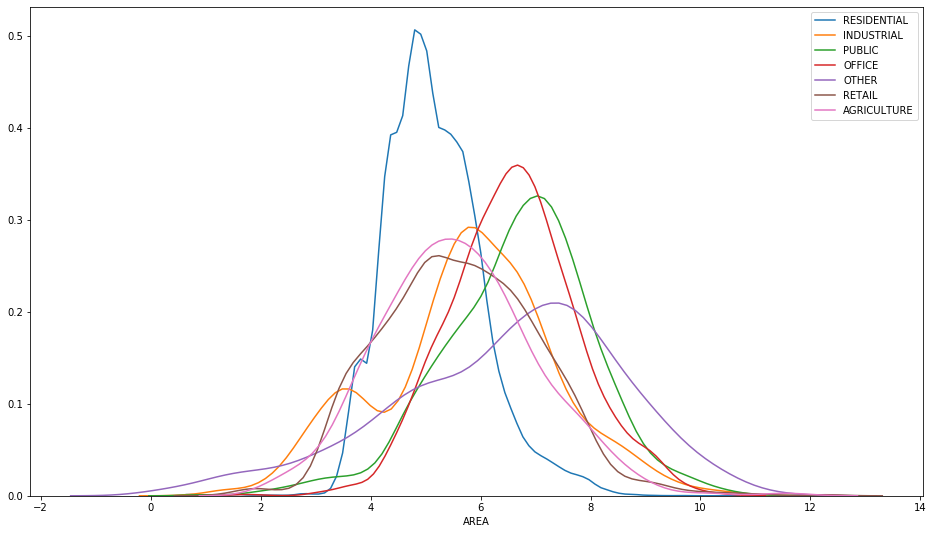

In [122]:
plt.figure(figsize=(16,9))
for clase in df.CLASE.unique():
    sns.distplot(df.loc[df.CLASE == clase, 'AREA'].apply(lambda x: math.log(x+1)), label=clase, hist=False)
    
plt.legend()

El Area como logaritmo puede ser un buen feature

In [105]:
df.CLASE.value_counts()/(df.shape[0]-85000)

RESIDENTIAL    4.946407
INDUSTRIAL     0.246297
PUBLIC         0.163247
RETAIL         0.114811
OFFICE         0.100274
OTHER          0.073066
AGRICULTURE    0.018541
Name: CLASE, dtype: float64

## Test Data Distribution

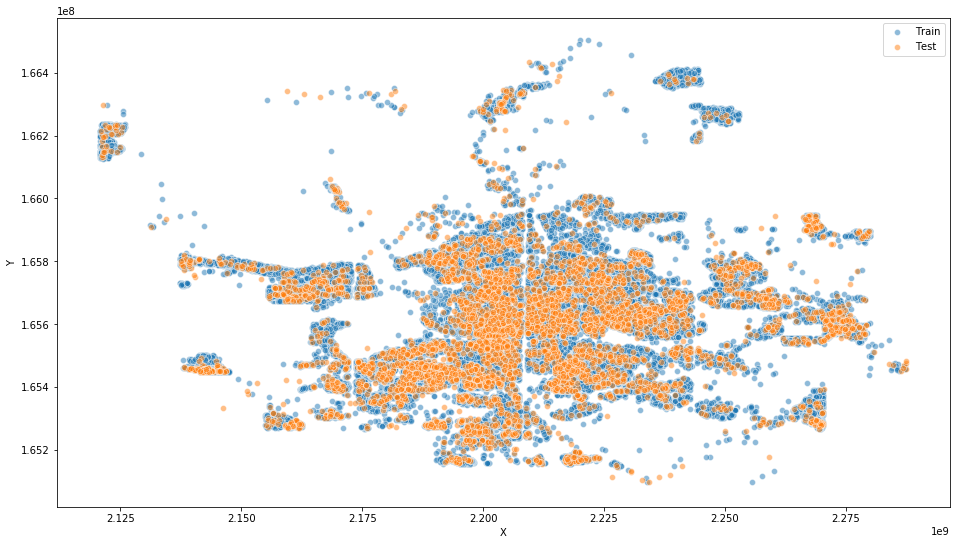

In [127]:
plt.figure(figsize=(16,9))
sns.scatterplot(df.X, df.Y, alpha=0.5, label='Train')
sns.scatterplot(df_test.X, df_test.Y, alpha=0.5, label='Test')

In [182]:
class_distribution = ((df.CLASE.value_counts()/(df.shape[0]-85000))[1:]).round(2)

class_distribution['RESIDENTIAL'] = 1 - class_distribution.sum()

class_distribution = class_distribution.to_dict()
class_distribution

{'INDUSTRIAL': 0.25,
 'PUBLIC': 0.16,
 'RETAIL': 0.11,
 'OFFICE': 0.1,
 'OTHER': 0.07,
 'AGRICULTURE': 0.02,
 'RESIDENTIAL': 0.29000000000000004}

In [199]:
indexes = set(df.loc[df.CLASE =='INDUSTRIAL'].index)

In [206]:
0.25*len(df)*0.2

5161.5

In [220]:
train_indexes_all = []
validation_indexes_all = []
test_size = 0.05
for name, prop in class_distribution.items():
    class_indexes = set(df.loc[df.CLASE == name].index)
    print(name, prop, round(prop*len(df)*test_size), len(class_indexes))
    val_indexes = random.sample(class_indexes, round(prop*len(df)*test_size))
    train_indexes = class_indexes - set(val_indexes)
    
    train_indexes_all += train_indexes
    validation_indexes_all += val_indexes
    
random.shuffle(train_indexes_all)
random.shuffle(validation_indexes_all)

INDUSTRIAL 0.25 1290 4490
PUBLIC 0.16 826 2976
RETAIL 0.11 568 2093
OFFICE 0.1 516 1828
OTHER 0.07 361 1332
AGRICULTURE 0.02 103 338
RESIDENTIAL 0.29000000000000004 1497 90173


In [221]:
len(train_indexes_all)

98069

In [222]:
len(validation_indexes_all)

5161

In [223]:
train_df = df.iloc[train_indexes_all]
val_df = df.iloc[validation_indexes_all]

In [224]:
train_df.shape

(98069, 56)

In [225]:
val_df.shape

(5161, 56)

In [226]:
train_df.CLASE.value_counts(normalize=True)

RESIDENTIAL    0.904220
INDUSTRIAL     0.032630
PUBLIC         0.021923
RETAIL         0.015550
OFFICE         0.013378
OTHER          0.009901
AGRICULTURE    0.002396
Name: CLASE, dtype: float64

In [227]:
train_df.CLASE.value_counts()

RESIDENTIAL    88676
INDUSTRIAL      3200
PUBLIC          2150
RETAIL          1525
OFFICE          1312
OTHER            971
AGRICULTURE      235
Name: CLASE, dtype: int64

In [228]:
val_df.CLASE.value_counts(normalize=True)

RESIDENTIAL    0.290060
INDUSTRIAL     0.249952
PUBLIC         0.160047
RETAIL         0.110056
OFFICE         0.099981
OTHER          0.069948
AGRICULTURE    0.019957
Name: CLASE, dtype: float64

In [229]:
val_df.CLASE.value_counts()

RESIDENTIAL    1497
INDUSTRIAL     1290
PUBLIC          826
RETAIL          568
OFFICE          516
OTHER           361
AGRICULTURE     103
Name: CLASE, dtype: int64

In [202]:
train_indexes = indexes - set(val_indexes)

In [203]:
df.iloc[list(train_indexes),:]

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
65536,8E3DDFB4481387F4,2187977692,165280361,1.442176e-05,633.000177,725.999939,804.000043,886.997424,980.000610,1083.000000,...,6798.207198,201.218225,0.643268,0.051020,0.062659,1.228109,1980,1.0,6,INDUSTRIAL
81924,AFF351A08EEB606D,2228043968,165474638,5.244626e-11,375.002936,542.003027,669.001495,773.998621,872.001068,981.000183,...,5664.174161,38.453383,0.466152,0.107406,0.112867,1.050847,1970,5.0,6,INDUSTRIAL
9,A4A6D078FB1079E5,2267210836,165899063,1.098887e-03,454.999338,573.005005,668.002612,752.999573,853.000122,1005.999158,...,5997.459077,333.617230,0.860099,0.046252,0.055740,1.205122,1990,1.0,6,INDUSTRIAL
81930,3AFBC284059EA809,2228405544,165625336,0.000000e+00,388.001147,584.004370,743.997858,891.000598,1042.505188,1201.999268,...,10952.938615,95.156950,0.493927,0.050505,0.102775,2.034943,1992,5.0,4,INDUSTRIAL
32783,33B3946CCBF4A9D6,2179428362,165506141,4.482069e-11,175.999672,211.000031,241.999855,274.999695,317.000198,372.000000,...,5733.918518,31.203500,0.571451,0.147059,0.124533,0.846824,1963,8.0,5,INDUSTRIAL
98320,BDDD089A080E1F57,2266997633,165933704,1.098887e-03,454.999338,573.005005,668.002612,752.999573,853.000122,1005.999158,...,5997.459077,733.455580,0.698227,0.035613,0.026731,0.750588,1977,1.0,6,INDUSTRIAL
49176,6A5571E109AA0B24,2269328296,165634390,3.532052e-05,584.000409,717.000000,859.998175,1016.000500,1205.998169,1459.001050,...,8742.907471,2653.801543,0.550574,0.011452,0.018116,1.581884,1970,2.0,6,INDUSTRIAL
16409,07D4BEAB6BB438E9,2192286532,165281116,2.146913e-06,464.999939,610.000220,721.000983,828.999976,953.000854,1122.000000,...,6636.505064,2998.195433,0.569552,0.010608,0.017908,1.688186,1981,1.0,5,INDUSTRIAL
65562,7B13F366590F6578,2196398333,165232505,8.356555e-04,607.999786,756.000671,888.998932,1022.998535,1149.000183,1283.999878,...,5425.178371,1397.449529,0.956076,0.027926,0.024499,0.877285,2000,1.0,4,INDUSTRIAL
65564,D4D6D83C5EB63B05,2249516071,165496660,0.000000e+00,406.999756,593.998291,732.006317,890.996765,1084.993958,1298.994507,...,10086.962241,266.244421,0.628820,0.047284,0.049950,1.056394,1992,3.0,6,INDUSTRIAL
